<a href="https://colab.research.google.com/github/haseebqureshii/ExamIn/blob/main/AQI_and_its_relationship_with_pollutant_concentrations_and_meteorological_factors_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global Air Quality Analysis

## Project Title
Global Air Quality Trends and Patterns

## Introduction
This project analyzes global air quality data to assess trends and patterns using the US EPA standard for calculating the Air Quality Index (AQI). By converting pollutant concentrations into AQI values via piecewise linear interpolation, the project identifies the worst-case pollutant and visualizes its impact over time.

## Data
The dataset contains the following columns:
- **Date**
- **Time**
- **CO(GT)**
- **C6H6(GT)**
- **NOx(GT)**
- **NO2(GT)**
- **T** (Temperature)
- **RH** (Relative Humidity)
- **AH** (Absolute Humidity)

Data cleaning and exploratory data analysis (EDA) were performed prior to this stage.

## Methodology
1. **AQI Calculation**  
   - Uses the US EPA AQI calculation standard.
   - Calculates pollutant-specific AQIs for CO and NO2 using defined breakpoints.
   - Determines the overall AQI as the maximum of the individual pollutant AQIs.

2. **Time Series Analysis**  
   - Combines 'Date' and 'Time' into a single 'Timestamp' column.
   - Visualizes AQI trends over time with a line plot.

3. **Correlation Analysis**  
   - Creates scatter plots to examine relationships between AQI and pollutants (CO, Benzene, NOx, NO2).
   - Explores the influence of meteorological factors (Temperature, Relative Humidity, Absolute Humidity) on AQI.

## Setup and Usage
1. Ensure you have Python 3.x and the required libraries installed:
   - pandas
   - numpy
   - matplotlib
   - seaborn

## Acknowledgments
Data for this project is sourced from global air quality monitoring systems, such as OpenAQ, and other related datasets.


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

## **Exploratory Data Analysis**

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


OBSERVATIONS:

The dataset appears significantly distorted when parsed using a comma delimiter.
The values are actually separated using semicolons (';') rather than commas.
Additionally, it's worth noting that decimal values are sometimes denoted using commas in certain instances.

In [61]:
# since the dataset has been delimited by ';', we need to change the delimiter to ';' instead ',' and decimals are represented by commas
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Air Quality Data Analysis/AirQuality.csv',sep=";", decimal=",",header=0)
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# shape of our dataset
# df.shape
print("No of rows in dataset:",df.shape[0])
print("No of columns in dataset:",df.shape[1])

No of rows in dataset: 9471
No of columns in dataset: 17


In [63]:
# names of the columns
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [64]:
# dtypes of the all columns
df.dtypes

,0
Date,object
Time,object
CO(GT),float64
PT08.S1(CO),float64
NMHC(GT),float64
C6H6(GT),float64
PT08.S2(NMHC),float64
NOx(GT),float64
PT08.S3(NOx),float64
NO2(GT),float64


In [65]:
# numerical estimates of all the numerical column
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


## **Handling Null Values**

In [67]:
# check null values in our dataset
df.isna().sum()

,0
Date,114
Time,114
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114


OBSERVATIONS:

Each column contains 114 missing values, though it remains unclear whether these represent entirely empty rows.
Two unnamed columns are completely blank.

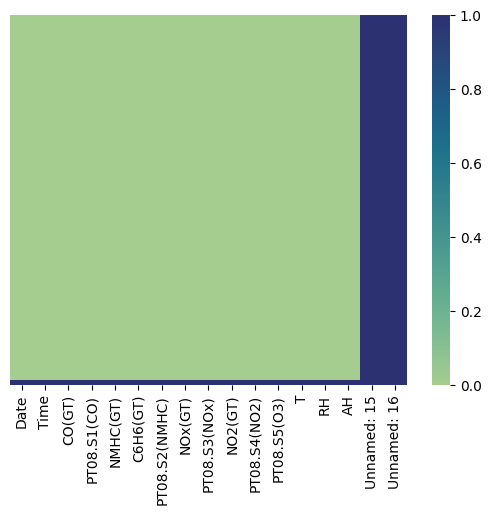

In [68]:
# visualizing the Na values using heatmap
sns.heatmap(df.isna(),yticklabels=False,cmap='crest',)
plt.show()

OBSERVATION: The last 114 rows in each column are empty.

In [69]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# dropping the last two columns
# assigning inplace argument as True which we result in completly dropping off of the last two columns
df.drop(columns=['Unnamed: 15', 'Unnamed: 16'],inplace=True)

In [71]:
# remaining columns
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

Two empty columns have been dropped permanently!

In [72]:
df.dropna(inplace=True)

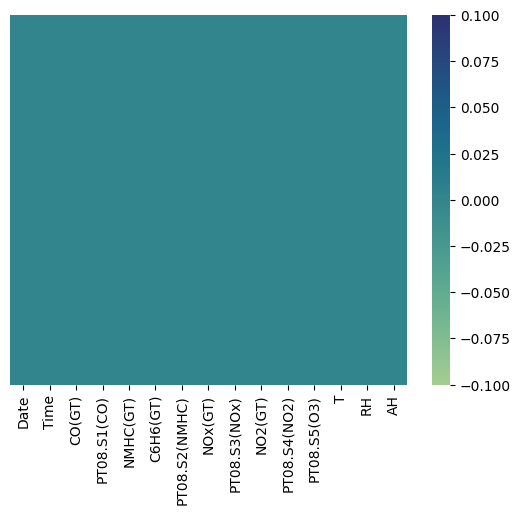

In [73]:
# no null values are now present in the dataset which was provided
sns.heatmap(df.isna(),yticklabels=False,cmap='crest')
plt.show()

According to the dataset description, null values are represented by the value -200.

In [74]:
df.replace(to_replace=-200,value=np.nan,inplace=True)

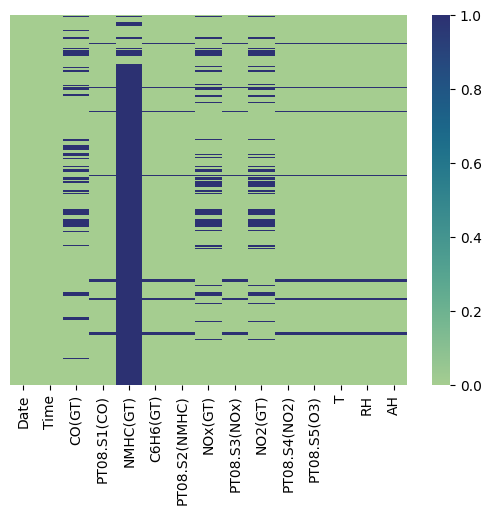

In [75]:
sns.heatmap(df.isna(),yticklabels=False,cmap='crest')
plt.show()

NMHC column has a lot of null values. We can drop the column!

In [76]:
df.drop(columns=['NMHC(GT)'],inplace=True)

In [77]:
df.isna().sum()

,0
Date,0
Time,0
CO(GT),1683
PT08.S1(CO),366
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642
PT08.S4(NO2),366


In [78]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

OBSERVATION: All columns except the Date and Time column contain null values.

In [79]:
# getting the datatypes of all the columns having null values
# first storing all the column names in a list having null values
col = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)','PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)','PT08.S5(O3)', 'T', 'RH', 'AH']
df = df[col]
df[col].dtypes

,0
CO(GT),float64
PT08.S1(CO),float64
C6H6(GT),float64
PT08.S2(NMHC),float64
NOx(GT),float64
PT08.S3(NOx),float64
NO2(GT),float64
PT08.S4(NO2),float64
PT08.S5(O3),float64
T,float64


In [80]:
df[col].head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


Since the data is real-valued, we should replace null values with the mean of each column.

In [81]:
for i in col:
    df[i] = df[i].fillna(df[i].mean())

In [82]:
df.isna().sum()

,0
CO(GT),0
PT08.S1(CO),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0
PT08.S4(NO2),0
PT08.S5(O3),0
T,0


**NULL values handled!**

## **Handling Outliers**

Outliers are extreme values that significantly deviate from the overall pattern of values in a dataset.

Handling outliers is crucial because they can distort the model's distribution and ultimately compromise its accuracy.

A boxplot can be used to identify outliers present in the dataset.

The box represents the interquartile range (IQR), with the median marked by a line inside the box.

Points located outside the whiskers are considered potential outliers.

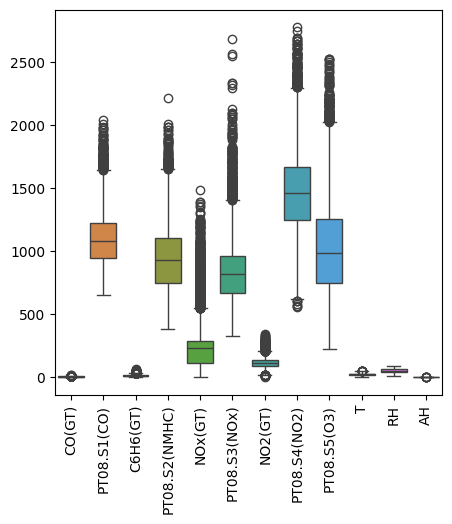

In [83]:
# plot a boxplot
plt.figure(figsize=(5,5))
sns.boxplot(data=df)
plt.xticks(rotation='vertical')
plt.show()

OBSERVATIONS:

We can observe that numerous data points lie outside the whiskers.

Let's count the outliers present in each column.: [link](https://stackoverflow.com/questions/39068214/how-to-count-outliers-for-all-columns-in-python)

In [84]:
# first and third quartile values for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
# interquartile range IQR
IQR = Q3 - Q1

In [85]:
# ivalues behind Q1 - (1.5 * IQR) or above Q3 + 1.5*IQR,
# then it is been defined as outlier
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

,0
CO(GT),454
PT08.S1(CO),145
C6H6(GT),286
PT08.S2(NMHC),91
NOx(GT),778
PT08.S3(NOx),278
NO2(GT),380
PT08.S4(NO2),131
PT08.S5(O3),131
T,10


**To handle outliers we can follow three steps:**
1. Trimming or removing outliers permanently.<br>
2. Quantile based flooring and capping.<br>
3. Replacing them with mean and median.<br>

**Our approach:**
- Trimming and removing outliers won't help much and may also results in data loss.
- Quantile based flooring and capping refer to replacing outliers with 10% and 90% quantile value.
- As mean value is highly influenced by the outliers, it been advised to use median to replace the outliers.

Reference: [click here](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/)

In [86]:
mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
mask

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9352,False,False,False,False,False,False,False,False,False,False,False,False
9353,False,False,False,False,False,False,False,False,False,False,False,False
9354,False,False,False,False,False,False,False,False,False,False,False,False
9355,False,False,False,False,False,False,False,False,False,False,False,False


In [87]:
# now replacing all the outliers using the median of that particular column
for i in mask.columns:
    df[i].astype('float')
    temp = df[i].median()
    df.loc[mask[i], i] = temp

In [88]:
# outliers are now being handled and are replaced with that column's median value
((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()

,0
CO(GT),0
PT08.S1(CO),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0
PT08.S4(NO2),0
PT08.S5(O3),0
T,0


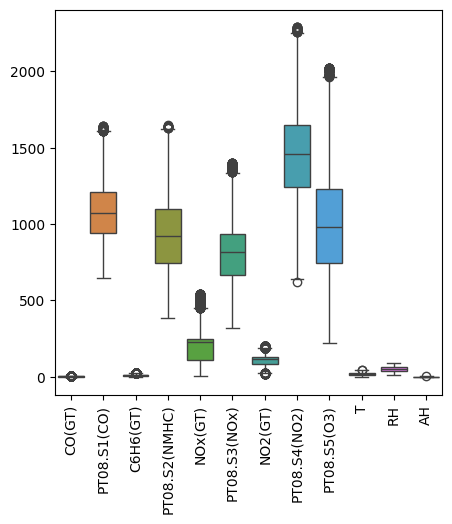

In [89]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df)
plt.xticks(rotation='vertical')
plt.show()

## **Converting Features (Categorical  to Numerical)**

In [90]:
df.head(20)

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.60000,1360.0,11.9,1046.0,166.000000,1056.0,113.000000,1692.0,1268.0,13.6,48.9,0.7578
1,2.00000,1292.0,9.4,955.0,103.000000,1174.0,92.000000,1559.0,972.0,13.3,47.7,0.7255
2,2.20000,1402.0,9.0,939.0,131.000000,1140.0,114.000000,1555.0,1074.0,11.9,54.0,0.7502
3,2.20000,1376.0,9.2,948.0,172.000000,1092.0,122.000000,1584.0,1203.0,11.0,60.0,0.7867
4,1.60000,1272.0,6.5,836.0,131.000000,1205.0,116.000000,1490.0,1110.0,11.2,59.6,0.7888
5,1.20000,1197.0,4.7,750.0,89.000000,1337.0,96.000000,1393.0,949.0,11.2,59.2,0.7848
6,1.20000,1185.0,3.6,690.0,62.000000,818.0,77.000000,1333.0,733.0,11.3,56.8,0.7603
7,1.00000,1136.0,3.3,672.0,62.000000,818.0,76.000000,1333.0,730.0,10.7,60.0,0.7702
8,0.90000,1094.0,2.3,609.0,45.000000,818.0,60.000000,1276.0,620.0,10.7,59.7,0.7648
9,0.60000,1010.0,1.7,561.0,246.896735,818.0,113.091251,1235.0,501.0,10.3,60.2,0.7517


In [91]:
df.dtypes

,0
CO(GT),float64
PT08.S1(CO),float64
C6H6(GT),float64
PT08.S2(NMHC),float64
NOx(GT),float64
PT08.S3(NOx),float64
NO2(GT),float64
PT08.S4(NO2),float64
PT08.S5(O3),float64
T,float64


**INFER: There are not categorical columns**

## **Find correlations between attributes**

In [92]:
# finding the correlation between all the features (pearson's correlation)
df.corr()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.685078,0.740949,0.717894,0.560216,-0.593482,0.568398,0.483957,0.668803,0.069788,-0.009705,0.051802
PT08.S1(CO),0.685078,1.000000,0.811695,0.853090,0.466673,-0.755626,0.515980,0.620339,0.851312,0.057536,0.103985,0.133650
C6H6(GT),0.740949,0.811695,1.000000,0.912236,0.450179,-0.712747,0.507309,0.691500,0.788554,0.232110,-0.108150,0.156286
PT08.S2(NMHC),0.717894,0.853090,0.912236,1.000000,0.467958,-0.768591,0.533579,0.727713,0.842632,0.251209,-0.106561,0.182036
NOx(GT),0.560216,0.466673,0.450179,0.467958,1.000000,-0.529675,0.677128,0.082173,0.543215,-0.189059,0.135411,-0.109367
PT08.S3(NOx),-0.593482,-0.755626,-0.712747,-0.768591,-0.529675,1.000000,-0.513462,-0.482471,-0.772358,-0.088810,-0.085665,-0.194880
NO2(GT),0.568398,0.515980,0.507309,0.533579,0.677128,-0.513462,1.000000,0.128650,0.561490,-0.108261,-0.109464,-0.249036
PT08.S4(NO2),0.483957,0.620339,0.691500,0.727713,0.082173,-0.482471,0.128650,1.000000,0.539569,0.581921,-0.047436,0.635000
PT08.S5(O3),0.668803,0.851312,0.788554,0.842632,0.543215,-0.772358,0.561490,0.539569,1.000000,-0.008959,0.120387,0.089491
T,0.069788,0.057536,0.232110,0.251209,-0.189059,-0.088810,-0.108261,0.581921,-0.008959,1.000000,-0.574588,0.658601


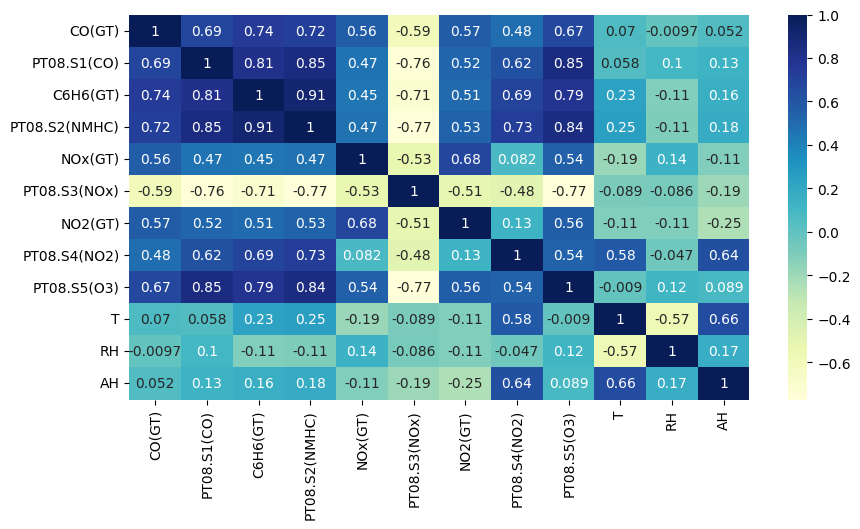

In [93]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)
plt.show()

According to Pearson's correlation, a correlation of 0 indicates no relationship. Positive and negative correlations suggest the existence of some relationship.

## **ML Problem (Regression)**

C6H6 and CO both are the tentative target variables.

In [94]:
def solve(X,y):

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=1)
    # using linear regression
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("R2_score of Linear Regression:",round(r2_score(y_test,y_pred), 5))

    model = Lasso(alpha=0.1)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("R2_score of Lasso Regression:", round(r2_score(y_test,y_pred), 5))

    model = Ridge(alpha=0.1)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("R2_score of Ridge Regression:", round(r2_score(y_test,y_pred), 5))

In [95]:
# choosing C6H6 as the target variable and other float dtype features as independed features
X = df[['CO(GT)', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)','PT08.S5(O3)']]
y = df['C6H6(GT)']

In [96]:
solve(X,y)

R2_score of Linear Regression: 0.85151
R2_score of Lasso Regression: 0.85096
R2_score of Ridge Regression: 0.85151


In [97]:
# now selecting CO(GT) as the target variables and other float dtype features as independent features
X = df[['C6H6(GT)','PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)','PT08.S5(O3)']]
y = df['CO(GT)']

In [98]:
solve(X,y)

R2_score of Linear Regression: 0.63685
R2_score of Lasso Regression: 0.6357
R2_score of Ridge Regression: 0.63685


C6H6 is now selected as the target variable because its R² score is higher compared to the R² score for CO(GT).

# Air Quality Index (AQI) Calculation - US EPA Standard

Using the US EPA breakpoints for AQI calculation. The breakpoints for key pollutants:

- **CO (ppm)**: [0.0-4.4, 4.5-9.4, 9.5-12.4, 12.5-15.4, 15.5-30.4, 30.5-40.4]
- **NO2 (ppb)**: [0-53, 54-100, 101-360, 361-649, 650-1249, 1250-2049]
- **Benzene (C6H6)**: Not a standard AQI pollutant; using as an auxiliary indicator.

In [100]:
def calculate_aqi(concentration, breakpoints, aqi_values):
    for i in range(len(breakpoints) - 1):
        if breakpoints[i] <= concentration <= breakpoints[i + 1]:
            c_low, c_high = breakpoints[i], breakpoints[i + 1]
            aqi_low, aqi_high = aqi_values[i], aqi_values[i + 1]
            return ((aqi_high - aqi_low) / (c_high - c_low)) * (concentration - c_low) + aqi_low
    return None

# AQI breakpoints and values
co_breakpoints = [0.0, 4.4, 9.4, 12.4, 15.4, 30.4, 40.4]
co_aqi_values = [0, 50, 100, 150, 200, 300, 400]

no2_breakpoints = [0, 53, 100, 360, 649, 1249, 2049]
no2_aqi_values = [0, 50, 100, 150, 200, 300, 400]

df["AQI_CO"] = df["CO(GT)"].apply(lambda x: calculate_aqi(x, co_breakpoints, co_aqi_values))
df["AQI_NO2"] = df["NO2(GT)"].apply(lambda x: calculate_aqi(x, no2_breakpoints, no2_aqi_values))

# Calculate Overall AQI
df["AQI"] = df[["AQI_CO", "AQI_NO2"]].max(axis=1)

Plot AQI Over Time

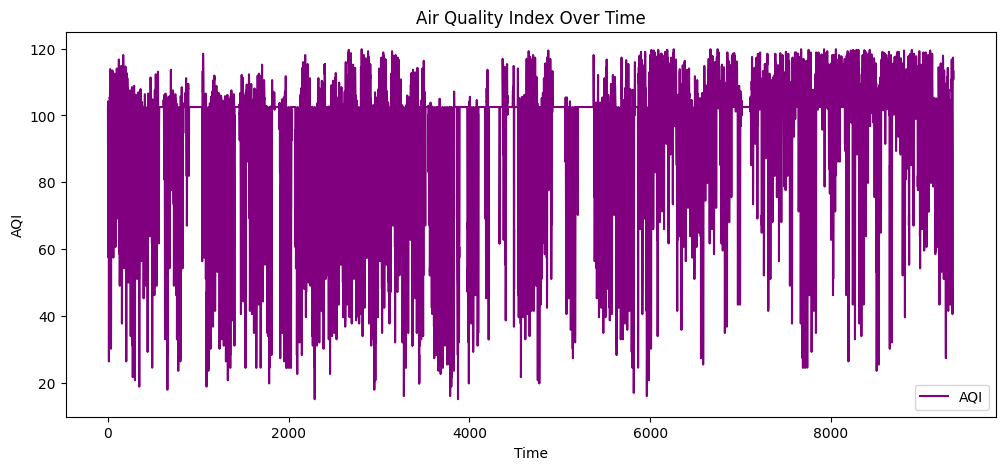

In [101]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["AQI"], label="AQI", color="purple")
plt.xlabel("Time")
plt.ylabel("AQI")
plt.title("Air Quality Index Over Time")
plt.legend()
plt.show()

This image is a **correlation matrix heatmap** showing how each pair of variables in the dataset is related. The numbers inside each cell are **correlation coefficients**, which range from **-1** (strong negative relationship) to **+1** (strong positive relationship). A value near **0** indicates little or no linear relationship. The color bar on the right maps these correlation values to colors: darker cells typically represent stronger relationships, whether positive or negative. This helps us quickly spot which pollutants and factors move together (positive correlation) or in opposite directions (negative correlation).

---

Scatter Plots of AQI vs Pollutants

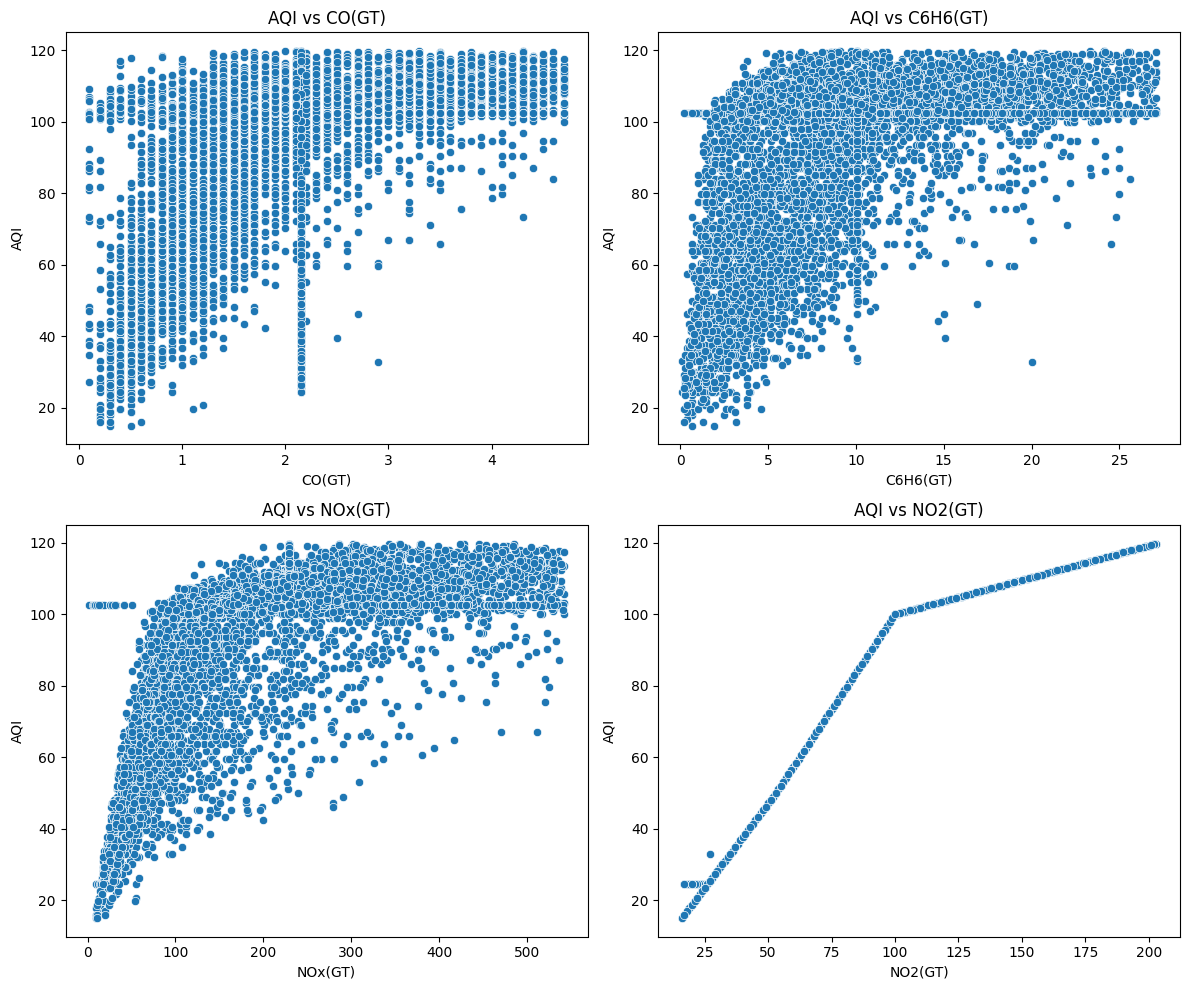

In [102]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.scatterplot(x=df["CO(GT)"], y=df["AQI"], ax=axes[0, 0]).set(title="AQI vs CO(GT)")
sns.scatterplot(x=df["C6H6(GT)"], y=df["AQI"], ax=axes[0, 1]).set(title="AQI vs C6H6(GT)")
sns.scatterplot(x=df["NOx(GT)"], y=df["AQI"], ax=axes[1, 0]).set(title="AQI vs NOx(GT)")
sns.scatterplot(x=df["NO2(GT)"], y=df["AQI"], ax=axes[1, 1]).set(title="AQI vs NO2(GT)")
plt.tight_layout()
plt.show()

## Top-left (AQI vs CO(GT)):

Shows how AQI changes with Carbon Monoxide (CO) levels.

AQI appears to increase with CO, but the spread suggests some non-linearity.

There's a denser region at lower CO levels, indicating that CO often stays low in the dataset.

## Top-right (AQI vs C6H6(GT)):

Displays AQI against Benzene (C6H6) concentrations.

Similar trend to CO—AQI increases as Benzene levels rise, suggesting a positive correlation.

The spread indicates AQI is influenced by multiple pollutants, not just C6H6.

## Bottom-left (AQI vs NOx(GT)):

Shows AQI vs Nitrogen Oxides (NOx).

The relationship appears non-linear, with AQI increasing rapidly at lower NOx values and stabilizing at higher values.

There is significant data density at lower NOx levels.

## Bottom-right (AQI vs NO2(GT)):

Displays a strongly linear relationship between AQI and Nitrogen Dioxide (NO2).

The near-perfect pattern suggests that AQI calculations rely heavily on NO2 values, likely because NO2 is a key pollutant in AQI determination.

---

Scatter Plots of AQI vs Meteorological Factors

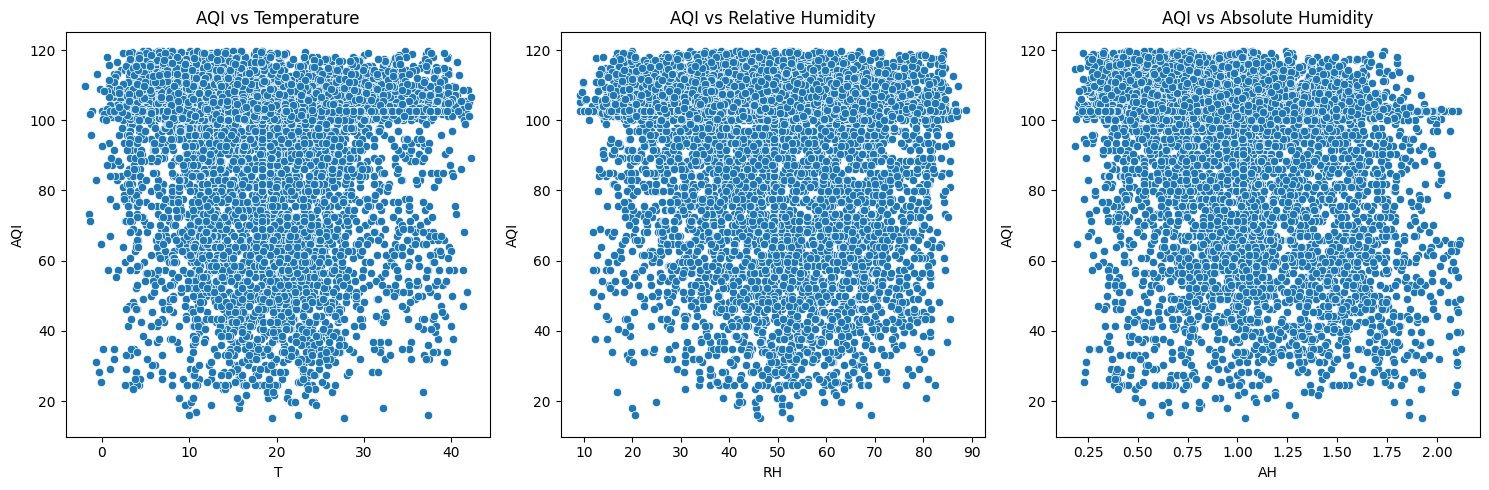

In [103]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(x=df["T"], y=df["AQI"], ax=axes[0]).set(title="AQI vs Temperature")
sns.scatterplot(x=df["RH"], y=df["AQI"], ax=axes[1]).set(title="AQI vs Relative Humidity")
sns.scatterplot(x=df["AH"], y=df["AQI"], ax=axes[2]).set(title="AQI vs Absolute Humidity")
plt.tight_layout()
plt.show()

This set of scatter plots examines the relationship between AQI (Air Quality Index) and three environmental factors: Temperature (T), Relative Humidity (RH), and Absolute Humidity (AH).

## Analysis of Each Plot:

### AQI vs Temperature (Left)

The points appear widely scattered with no clear upward or downward trend.

This suggests that temperature does not have a strong direct impact on AQI.

The distribution remains dense across all AQI values, indicating that air quality is not significantly affected by temperature alone.

### AQI vs Relative Humidity (Middle)

The plot is again highly scattered, without a clear pattern.

There is no obvious correlation between AQI and Relative Humidity.

This means humidity might not be a strong predictor of AQI on its own, or its effect could be indirect through interactions with other pollutants.

### AQI vs Absolute Humidity (Right)

Similar to the previous two plots, the data points are uniformly spread out.

Absolute Humidity does not seem to have a direct impact on AQI, as AQI values are evenly distributed across different humidity levels.

### Takeaways:
Unlike pollutants (CO, NOx, NO2, etc.), environmental factors like temperature and humidity do not show a strong correlation with AQI.

This suggests that AQI is more influenced by pollutant concentrations rather than direct changes in weather conditions.

However, indirect effects (such as humidity affecting pollutant dispersion or chemical reactions) may still exist but are not evident in a simple scatter plot.